In [ ]:
# from atm_data.data_utils.weather_noaa_data import *
from weather_data_processing import *
from pathlib import Path
from ast import literal_eval
import pandas as pd
import numpy as np
import functools

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
%matplotlib ipympl

from matplotlib import cm, colors
from scipy.stats import gaussian_kde as kde

from scipy.stats import pearsonr

airport = 'LGA'

In [ ]:
data_dir = Path.cwd().resolve().parent / 'data'
# weather_path = data_dir / 'noaa_lcdv2/lcd_lga_1987-2023_cleaned.parquet'
weather_path = data_dir / f'noaa_lcdv2/cleaned/lcd_{airport.lower()}_2018-2019_cleaned.parquet'
# TODO: handling in the bayesair remapped to like not have to do the "_decade" suffix
# schedule_path = data_dir / 'bts_remapped/lga_reduced_2010-2019_clean_decade/parquet/lga_reduced_2010-2019_clean_decade.parquet'
schedule_path = data_dir / f'bts_remapped/{airport}/2019/_reduced_2018-2020_clean.parquet'

# start_date = "2019-07-01"
# end_date = "2019-08-01" # exclusive

# start_date = "2010-01-01"
# end_date = "2020-01-01" # exclusive

start_date = "2018-01-01"
end_date = "2020-01-01" # exclusive


wdf = pd.read_parquet(weather_path)
sdf = pd.read_parquet(schedule_path)
sdf = (
    sdf.set_index(
        pd.DatetimeIndex(sdf['date'])
    )
    .drop(['date'], axis=1)
)


wdf = wdf.loc[(wdf.index >= start_date) & (wdf.index < end_date)]
sdf = sdf.loc[(sdf.index >= start_date) & (sdf.index < end_date)]

# mask = (sdf.scheduled_departure_time == sdf.scheduled_arrival_time)
# display(sdf.loc[mask])

for df in (wdf, sdf):
    display(df)
    display(df.dtypes)


hourly_alitmeter_setting  hourly_dew_point_temperature  \
date                                                                          
2010-01-01 00:00:00                    1015.2                          -0.6   
2010-01-01 01:00:00                    1015.2                           0.0   
2010-01-01 02:00:00                    1014.9                           0.0   
2010-01-01 03:00:00                    1014.6                           0.0   
2010-01-01 04:00:00                    1014.2                           0.0   
...                                       ...                           ...   
2019-12-31 19:00:00                    1003.0                           1.7   
2019-12-31 20:00:00                    1004.1                           1.1   
2019-12-31 21:00:00                    1003.7                           0.0   
2019-12-31 22:00:00                    1003.4                           0.0   
2019-12-31 23:00:00                    1003.7                          -2.8   

                     hourly_dry_bulb_temperature  hourly_precipitation  \
date                                                                     
2010-01-01 00:00:00                          0.6                   0.3   
2010-01-01 01:00:00                          1.1                   0.0   
2010-01-01 02:00:00                          1.1                   0.0   
2010-01-01 03:00:00                          0.6                   0.0   
2010-01-01 04:00:00                          0.6                   0.0   
...                                          ...                   ...   
2019-12-31 19:00:00                          7.2                   0.0   
2019-12-31 20:00:00                          6.7                   0.3   
2019-12-31 21:00:00                          6.1                   0.0   
2019-12-31 22:00:00                          5.6                   0.0   
2019-12-31 23:00:00                          5.6                   0.0   

                     hourly_relative_humidity  hourly_visibility  \
date                                                               
2010-01-01 00:00:00                      92.0              4.023   
2010-01-01 01:00:00                      92.0              4.023   
2010-01-01 02:00:00                      92.0              4.828   
2010-01-01 03:00:00                      96.0              8.047   
2010-01-01 04:00:00                      96.0              8.047   
...                                       ...                ...   
2019-12-31 19:00:00                      68.0             16.093   
2019-12-31 20:00:00                      68.0             16.093   
2019-12-31 21:00:00                      65.0             16.093   
2019-12-31 22:00:00                      68.0             16.093   
2019-12-31 23:00:00                      55.0             16.093   

                     hourly_wind_direction  hourly_wind_speed  \
date                                                            
2010-01-01 00:00:00                   60.0                1.5   
2010-01-01 01:00:00                   60.0                0.0   
2010-01-01 02:00:00                   80.0                1.5   
2010-01-01 03:00:00                   90.0                0.0   
2010-01-01 04:00:00                  100.0                1.5   
...                                    ...                ...   
2019-12-31 19:00:00                  210.0                4.6   
2019-12-31 20:00:00                  280.0                7.2   
2019-12-31 21:00:00                  270.0                6.2   
2019-12-31 22:00:00                  300.0                5.7   
2019-12-31 23:00:00                  280.0                6.2   

                     hourly_wind_gust_speed  hpwt_BCFG  ...  \
date                                                    ...   
2010-01-01 00:00:00                     0.0      False  ...   
2010-01-01 01:00:00                     0.0      False  ...   
2010-01-01 02:00:00                     0.0    

hourly_alitmeter_setting         float64
hourly_dew_point_temperature     float64
hourly_dry_bulb_temperature      float64
hourly_precipitation             float64
hourly_relative_humidity         float64
hourly_visibility                float64
hourly_wind_direction            float64
hourly_wind_speed                float64
hourly_wind_gust_speed           float64
hpwt_BCFG                        boolean
hpwt_BL                          boolean
hpwt_BLSN                        boolean
hpwt_BR                          boolean
hpwt_DRSN                        boolean
hpwt_DZ                          boolean
hpwt_FG                          boolean
hpwt_FU                          boolean
hpwt_FZDZ                        boolean
hpwt_FZFG                        boolean
hpwt_FZRA                        boolean
hpwt_GR                          boolean
hpwt_GS                          boolean
hpwt_HAIL                        boolean
hpwt_HZ                          boolean
hpwt_MIFG       

flight_number tail_number origin_airport destination_airport  \
date                                                                      
2010-01-01        AA:705      N4XPAA            LGA                 DFW   
2010-01-01       AA:2257      N5DCAA            LGA                 MIA   
2010-01-01        B6:371      N661JB            LGA                 FLL   
2010-01-01       DL:1769      N676DL            LGA                 ATL   
2010-01-01        FL:359      N338AT            LGA                 ATL   
...                  ...         ...            ...                 ...   
2019-12-31       B6:1332      N328JB            LGA                 BOS   
2019-12-31       DL:2814      N321DH            ATL                 LGA   
2019-12-31       B6:1431      N198JB            BOS                 LGA   
2019-12-31        NK:423      N607NK            LGA                 MCO   
2019-12-31       F9:2879      N349FR            LGA                 MIA   

            scheduled_departure_time  scheduled_arrival_time  \
date                                                           
2010-01-01                  6.000000               10.083333   
2010-01-01                  6.000000                9.166667   
2010-01-01                  6.000000                8.950000   
2010-01-01                  6.000000                8.733333   
2010-01-01                  6.000000                8.600000   
...                              ...                     ...   
2019-12-31                 21.500000               22.683333   
2019-12-31                 21.500000               23.633333   
2019-12-31                 21.500000               22.783333   
2019-12-31                 21.833333               24.783333   
2019-12-31                 22.750000               25.950000   

            actual_departure_time  actual_arrival_time  wheels_off_time  \
date                                                                      
2010-01-01               5.916667             9.833333         6.183333   
2010-01-01               6.100000             9.433333         6.533333   
2010-01-01               6.050000             9.650000         6.766667   
2010-01-01               6.000000             8.616667         6.283333   
2010-01-01               5.950000             8.900000         6.433333   
...                           ...                  ...              ...   
2019-12-31              21.200000            22.250000        21.400000   
2019-12-31              21.466667            23.350000        21.650000   
2019-12-31              21.616667            22.516667        21.850000   
2019-12-31              21.750000            24.450000        21.933333   
2019-12-31              22.666667            25.550000        22.883333   

            wheels_on_time  ...  carrier_delay  weather_delay  nas_delay  \
date                        ...                                            
2010-01-01        9.750000  ...           0.00            0.0   0.000000   
2010-01-01        9.316667  ...           0.00            0.1   0.166667   
2010-01-01        9.566667  ...           0.05            0.0   0.650000   
2010-01-01        8.466667  ...           0.00            0.0   0.000000   
2010-01-01        8.750000  ...           0.00            0.0   0.300000   
...                    ...  ...            ...            ...        ...   
2019-12-31       22.100000  ...           0.00            0.0   0.000000   
2019-12-31       23.233333  ...           0.00            0.0   0.000000   
2019-12-31       22.483333  ...           0.00            0.0   0.000000   
2019-12-31       24.233333  ...           0.00            0.0   0.000000   
2019-12-31       25.333333  ...           0.00            0.0   0.000000   

            security_delay  late_aircraft_delay  cancelled  cancellation_code  \
date                                                                            
2010-01-01             0.0                  0.0      False                 

flight_number                   string[python]
tail_number                     string[python]
origin_airport                  string[python]
destination_airport             string[python]
scheduled_departure_time               float64
scheduled_arrival_time                 float64
actual_departure_time                  float64
actual_arrival_time                    float64
wheels_off_time                        float64
wheels_on_time                         float64
departure_delay                        float64
arrival_delay                          float64
carrier_delay                          float64
weather_delay                          float64
nas_delay                              float64
security_delay                         float64
late_aircraft_delay                    float64
cancelled                              boolean
cancellation_code                     category
diverted                               boolean
diverted_reached_destination           boolean
diverted_airp

In [162]:
# TODO: some stats
# mask = (sdf.origin_airport == 'LGA')
# mask = (sdf.destination_airport == 'LGA')
# mask = (sdf.scheduled_departure_time == sdf.scheduled_arrival_time)
# display(sdf.loc[mask, ["scheduled_departure_time", "scheduled_arrival_time"]])
# display(sdf.loc[mask])
# uhh ok i guess it wasn't an sisue

sdf['scheduled_event_time'] = sdf.scheduled_departure_time.copy()
mask = sdf.destination_airport == 'LGA'
sdf.loc[mask, "scheduled_event_time"] = sdf.loc[mask, "scheduled_arrival_time"]

sdf['actual_event_time'] = sdf.actual_departure_time.copy()
mask = sdf.destination_airport == 'LGA'
sdf.loc[mask, "actual_event_time"] = sdf.loc[mask, "actual_arrival_time"]

sdf['scheduled_event_datetime'] = sdf.index + pd.to_timedelta(sdf.scheduled_event_time, unit='H')
sdf['actual_event_datetime'] = sdf.index + pd.to_timedelta(sdf.actual_event_time, unit='H')

sdf['event_delay'] = sdf.actual_event_time - sdf.scheduled_event_time
sdf.loc[sdf.cancelled | sdf.diverted, 'event_delay'] = 0.0

sdf['event_delay_relu'] = sdf.event_delay.clip(lower=0.0)
sdf['arrival_delay_relu'] = sdf.arrival_delay.clip(lower=0.0)
sdf['departure_delay_relu'] = sdf.departure_delay.clip(lower=0.0)

display(sdf)

flight_number tail_number origin_airport destination_airport  \
date                                                                      
2010-01-01        AA:705      N4XPAA            LGA                 DFW   
2010-01-01       AA:2257      N5DCAA            LGA                 MIA   
2010-01-01        B6:371      N661JB            LGA                 FLL   
2010-01-01       DL:1769      N676DL            LGA                 ATL   
2010-01-01        FL:359      N338AT            LGA                 ATL   
...                  ...         ...            ...                 ...   
2019-12-31       B6:1332      N328JB            LGA                 BOS   
2019-12-31       DL:2814      N321DH            ATL                 LGA   
2019-12-31       B6:1431      N198JB            BOS                 LGA   
2019-12-31        NK:423      N607NK            LGA                 MCO   
2019-12-31       F9:2879      N349FR            LGA                 MIA   

            scheduled_departure_time  scheduled_arrival_time  \
date                                                           
2010-01-01                  6.000000               10.083333   
2010-01-01                  6.000000                9.166667   
2010-01-01                  6.000000                8.950000   
2010-01-01                  6.000000                8.733333   
2010-01-01                  6.000000                8.600000   
...                              ...                     ...   
2019-12-31                 21.500000               22.683333   
2019-12-31                 21.500000               23.633333   
2019-12-31                 21.500000               22.783333   
2019-12-31                 21.833333               24.783333   
2019-12-31                 22.750000               25.950000   

            actual_departure_time  actual_arrival_time  wheels_off_time  \
date                                                                      
2010-01-01               5.916667             9.833333         6.183333   
2010-01-01               6.100000             9.433333         6.533333   
2010-01-01               6.050000             9.650000         6.766667   
2010-01-01               6.000000             8.616667         6.283333   
2010-01-01               5.950000             8.900000         6.433333   
...                           ...                  ...              ...   
2019-12-31              21.200000            22.250000        21.400000   
2019-12-31              21.466667            23.350000        21.650000   
2019-12-31              21.616667            22.516667        21.850000   
2019-12-31              21.750000            24.450000        21.933333   
2019-12-31              22.666667            25.550000        22.883333   

            wheels_on_time  ...  diverted_reached_destination  \
date                        ...                                 
2010-01-01        9.750000  ...                          <NA>   
2010-01-01        9.316667  ...                          <NA>   
2010-01-01        9.566667  ...                          <NA>   
2010-01-01        8.466667  ...                          <NA>   
2010-01-01        8.750000  ...                          <NA>   
...                    ...  ...                           ...   
2019-12-31       22.100000  ...                          <NA>   
2019-12-31       23.233333  ...                          <NA>   
2019-12-31       22.483333  ...                          <NA>   
2019-12-31       24.233333  ...                          <NA>   
2019-12-31       25.333333  ...                          <NA>   

            diverted_airport_landings  scheduled_event_time  \
date                                                          
2010-01-01                          0              6.000000   
2010-01-01                          0              6.000000   
2010-01-01                          0              6.000000   
2010-01-01                          0              6.000000   
20

In [64]:
def plot_condition_and_delays(
    type, 
    # these should be aligned time-wise
    conditions,
    dep_delays,
    arr_delays,
    start,
    end,
    condition_aggregation,
    delay_aggregation,
    colors = ('blue', 'red', 'orange'),
    figsize = (8,8)
):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()

    ax.plot(conditions, color=colors[0], label=f'{type}')
    ax2.plot(dep_delays, color=colors[1], label='departure delay')
    ax2.plot(arr_delays, color=colors[2], label='arrival delay')

    add_decorations(fig, ax, ax2, type, condition_aggregation, delay_aggregation, start, end, 'horizontal')

    return fig


def scatter_condition_and_delays(
    type, 
    # these should be aligned time-wise
    conditions,
    dep_delays,
    arr_delays,
    start,
    end,
    condition_aggregation,
    delay_aggregation,
    colors = ('blue', 'red', 'orange'),
    figsize = (8,8)
):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    def plot_scatter_and_trend(ax, x, y, color, linestyle='-', marker='.', label=None, d=1):        
        ax.scatter(x, y, color=c, marker=marker, label=label)
        z = np.polyfit(x, y, deg=d)
        p = np.poly1d(z)
        plt.plot(x, p(x), color=color, linestyle=linestyle)

    x = conditions
    for y, c, l in ((dep_delays, colors[1], 'departure'), (arr_delays, colors[2], 'arrival')):
        r, _ = pearsonr(x, y)
        plot_scatter_and_trend(ax, x.to_numpy(), y.to_numpy(), c, label=f'{l}, ρ={r:.03f}')

    add_decorations(fig, ax, None, type, condition_aggregation, delay_aggregation, start, end, 'vertical')

    return fig


def add_decorations(
    fig, ax, ax2, type, condition_aggregation, delay_aggregation, start, end, side
):
    if side == 'horizontal':
        set_condition_label = ax.set_ylabel
        set_delay_label = ax2.set_ylabel
        ax.set_ylim(bottom=0)
        add_flight_rule_regions(ax, type, 'horizontal')
        ax.set_xlabel('date')
        fig.legend()
    elif side == 'vertical':
        set_condition_label = ax.set_xlabel
        set_delay_label = ax.set_ylabel
        ax.set_xlim(left=0)
        add_flight_rule_regions(ax, type, 'vertical')
        ax.legend()
    else:
        raise ValueError

    set_condition_label(
        f"{type} {'(ft)' if type == 'ceiling' else '(mi)'} -- lower is worse -- [{condition_aggregation}]"
    )
    set_delay_label(f'delay (hrs) -- higher is worse -- [{delay_aggregation}]')

    ax.set_title(
        f'{type} and delays between {start} and {end}'
    )


def add_flight_rule_regions(
    ax, 
    type,
    side, 
    thresholds=None,
    colors=None,
    alpha=.2,
    linestyle='--',
):
    if side == 'horizontal':
        add_line = ax.axhline
        add_span = ax.axhspan
        cmin, cmax = ax.get_ylim()            
    elif side == 'vertical':
        add_line = ax.axvline
        add_span = ax.axvspan
        cmin, cmax = ax.get_xlim()
    else:
        raise ValueError('type must be horizontal or vertical :(')

    if thresholds is None:
        if type == 'ceiling':
            thresholds = [500, 1000, 3200]
        elif type == 'visibility':
            thresholds = [1, 3, 4]
        else:
            raise ValueError('type must be ceiling or visibility')
    else:
        assert len(thresholds) == 3 # TODO: generalize??
        
    if colors is None:
        colors = ['darkred', 'red', 'yellow', 'lightgreen']
    else:
        assert len(colors) == 4 # TODO: generalize??

    for threshold, color in zip(thresholds, colors):
        add_line(threshold, color=color, linestyle=linestyle)
    
    span_lo = [cmin] + thresholds
    span_hi = thresholds + [cmax]

    labels = [
        'LIFR (low IFR)',
        'IFR (instrument)',
        'MVFR (marginal)',
        'VFR (visual)',
    ]
    
    for lo, hi, color, label in zip(span_lo, span_hi, colors, labels):
        add_span(lo, hi, facecolor=color, alpha=alpha, label=label)



In [163]:
# TODO: maybe we can auto-generate a description??
def process_series(
    s,
    *argv,
):
    # print(argv)
    for arg in argv:
        # print(arg, type(arg))
        if isinstance(arg, str):
            action = arg
            if action == 'no_inf':
                s = s.loc[~s.isin([np.inf])]
            elif action == 'no_nan':
                s = s.loc[~s.isin([np.nan])]
            elif action == 'inverse':
                s = 1.0 / s
        elif isinstance(arg, (list, tuple, np.ndarray)):
            action = arg[0]
            if action == 'scale':
                s = s * arg[1]
            elif action == 'clip':
                s = s.clip(lower=arg[1], upper=arg[2])
            elif action == 'filter_index':
                s = s.loc[(arg[1] <= s.index) & (s.index < arg[2])]
            elif action == 'apply_func':
                s = s.apply(arg[1])
            elif action == 'apply_func_vec':
                s = arg[1](s)
            else:
                sg = s.groupby(pd.Grouper(freq=arg[1]))
                if action == 'mean':
                    s = sg.mean()
                elif action == 'min':
                    s = sg.min()
                elif action == 'max':
                    s = sg.max()
                elif action == 'size':
                    s = sg.size()
                else:
                    raise ValueError(f'invalid step: {arg}')
    return s

freq = '1D'
ceiling = wdf.hsc_ceiling_height

process_ceiling = functools.partial(process_series, ceiling)

ch_daily_finite_mean = process_ceiling(
    'no_inf', 'no_nan', ('mean', freq)
)

ch_daily_min = process_ceiling(
    'min'
)

ch_daily_inverse_mean = process_ceiling(
    'inverse', ('mean', freq)
)
ch_daily_harmonic_mean = process_series(
    ch_daily_inverse_mean, 'inverse'
)

ch_hourly_clipped = process_ceiling(
    ('clip', .5, 64)
)

ch_daily_clipped_mean = process_series(
    ch_hourly_clipped, ('mean', freq)
)

ch_daily_clipped_inverse_mean = process_series(
    ch_hourly_clipped, ('inverse'), ('mean', freq)  
)

ch_daily_clipped_harmonic_mean = process_series(
    ch_daily_clipped_inverse_mean, ('inverse')
)

# display(ch_daily_clipped_harmonic_mean.nsmallest(5))

sdf_outgoing = sdf.loc[sdf.origin_airport == 'LGA']
sdf_incoming = sdf.loc[sdf.destination_airport == 'LGA']

dep_delay_daily = process_series(
    sdf_outgoing.departure_delay_relu, ('mean', freq)
)
arr_delay_daily = process_series(
    sdf_incoming.arrival_delay_relu, ('mean', freq)
)


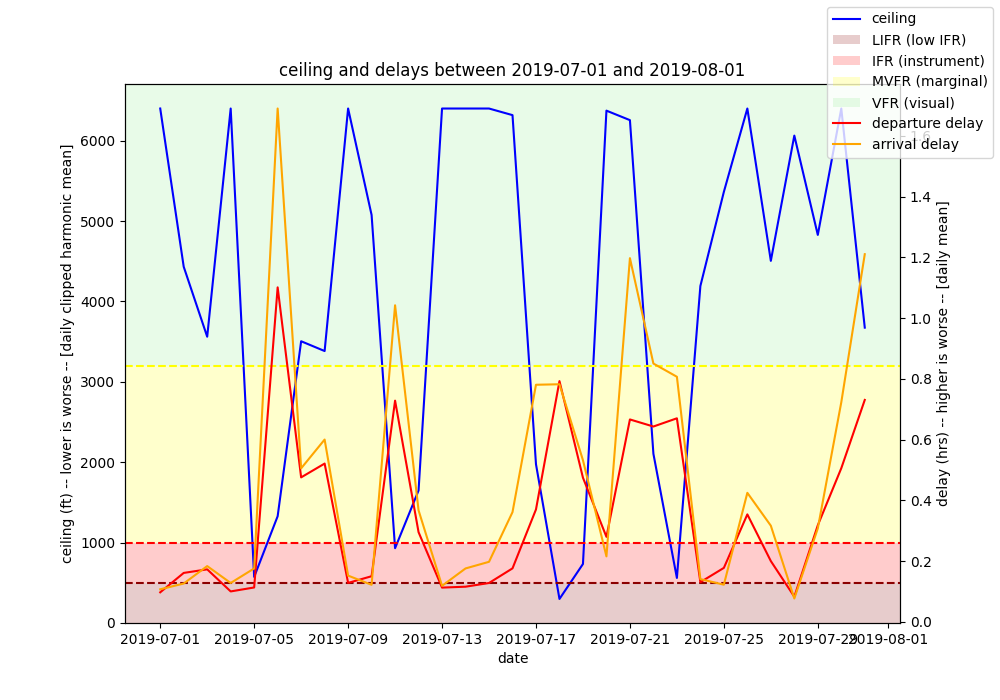

In [165]:
# show that we can do these from scratch easily!
# though maybe kinda silly and not much benefit over pandas methods
freq = '1D'
start = '2019-07-01'
end = '2019-08-01'

processed_ceiling = process_series(
    wdf.hsc_ceiling_height,
    ('filter_index', start, end),
    ('clip', .5, 64), 
    ('scale', 100), 
    ('inverse'), 
    ('mean', freq), 
    ('inverse'),
)
v = processed_ceiling

d = process_series(
    sdf_outgoing.departure_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

a = process_series(
    sdf_incoming.arrival_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

fig = plot_condition_and_delays(
    type='ceiling', 
    conditions=v,
    dep_delays=d,
    arr_delays=a,
    start=start,
    end=end,
    condition_aggregation='daily clipped harmonic mean',
    delay_aggregation='daily mean',
    figsize=(10,7)
)

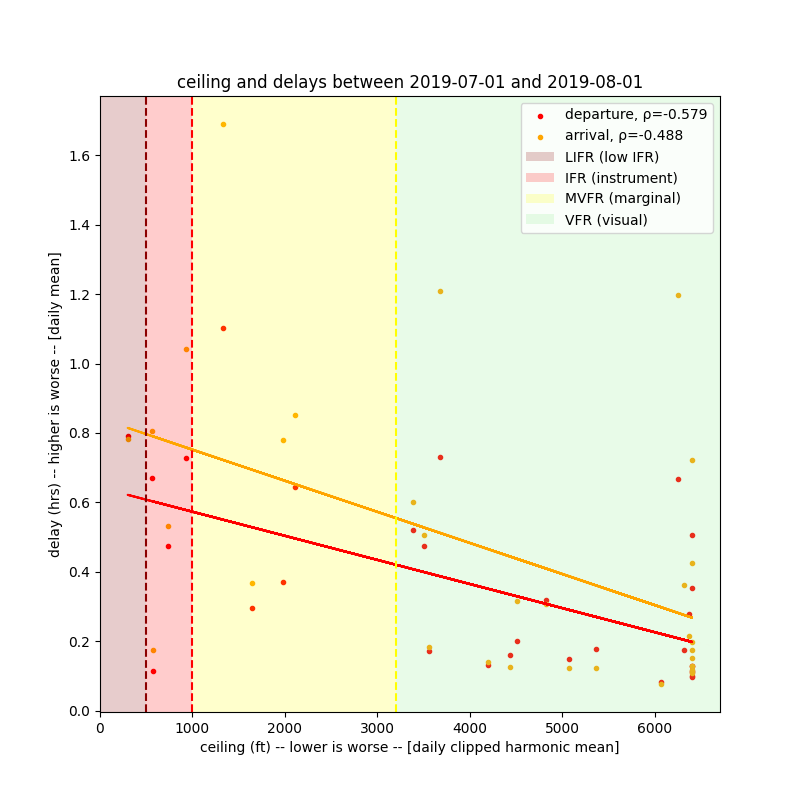

In [166]:
fig = scatter_condition_and_delays(
    type='ceiling', 
    conditions=v,
    dep_delays=d,
    arr_delays=a,
    start=start,
    end=end,
    condition_aggregation='daily clipped harmonic mean',
    delay_aggregation='daily mean',
    figsize=(8,8)
)

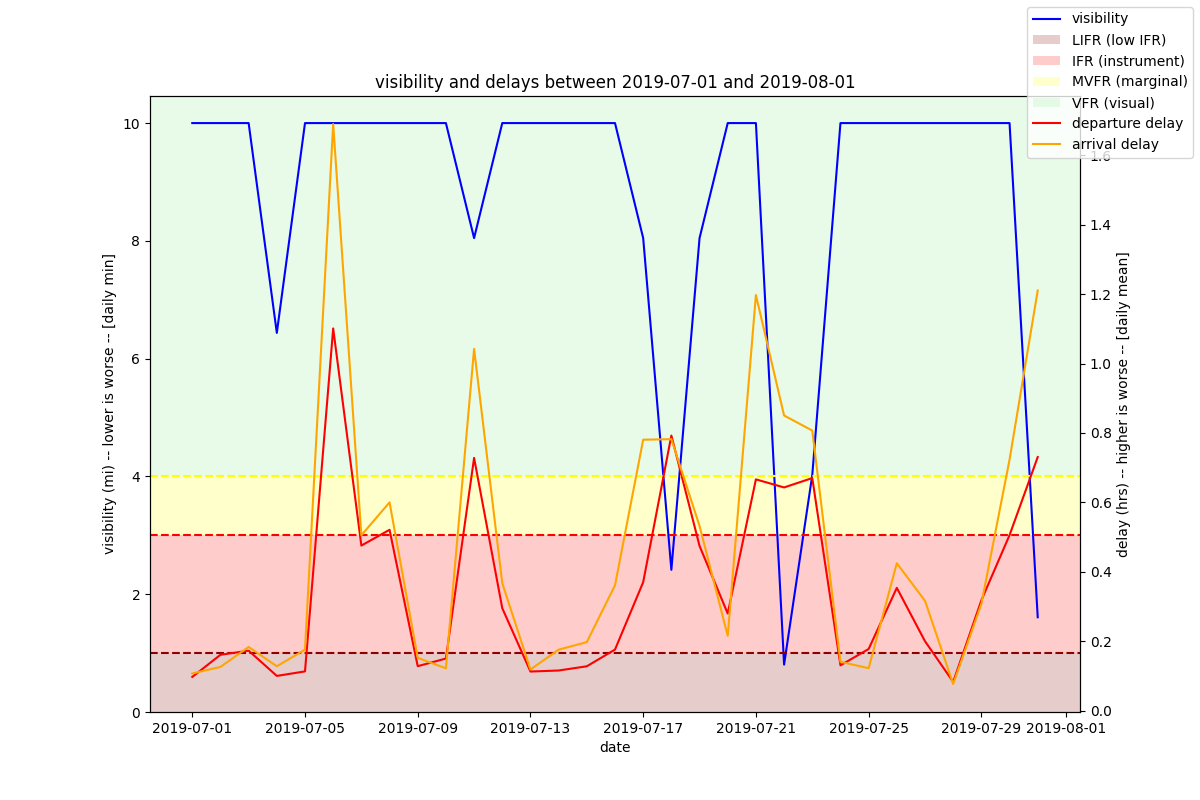

In [167]:
processed_visibility = process_series(
    wdf.hourly_visibility,
    ('filter_index', start, end),
    ('clip', .001, 10), 
    # ('inverse'), 
    # ('mean', freq), 
    # ('inverse'),
    ('min', freq)
)

v = processed_visibility

fig = plot_condition_and_delays(
    type='visibility', 
    conditions=v,
    dep_delays=d,
    arr_delays=a,
    start=start,
    end=end,
    condition_aggregation='daily min',
    delay_aggregation='daily mean',
    figsize=(12,8)
)

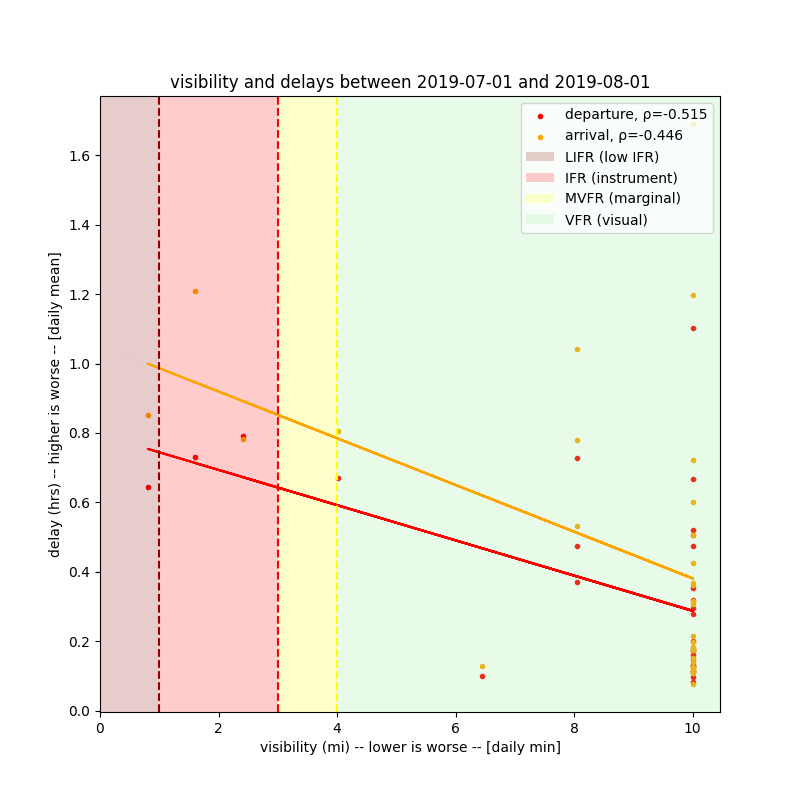

In [168]:
fig = scatter_condition_and_delays(
    type='visibility', 
    conditions=v,
    dep_delays=d,
    arr_delays=a,
    start=start,
    end=end,
    condition_aggregation='daily min',
    delay_aggregation='daily mean',
    figsize=(8,8)
)

[[1.00000000e+04 9.38905432e+03 6.51949819e+03 ... 5.83897070e+02
  2.08502590e+02 5.78082800e+02]
 [1.00000000e+01 1.00000000e+01 1.00000000e+01 ... 2.41400000e+00
  2.41400000e+00 1.00000000e+01]]


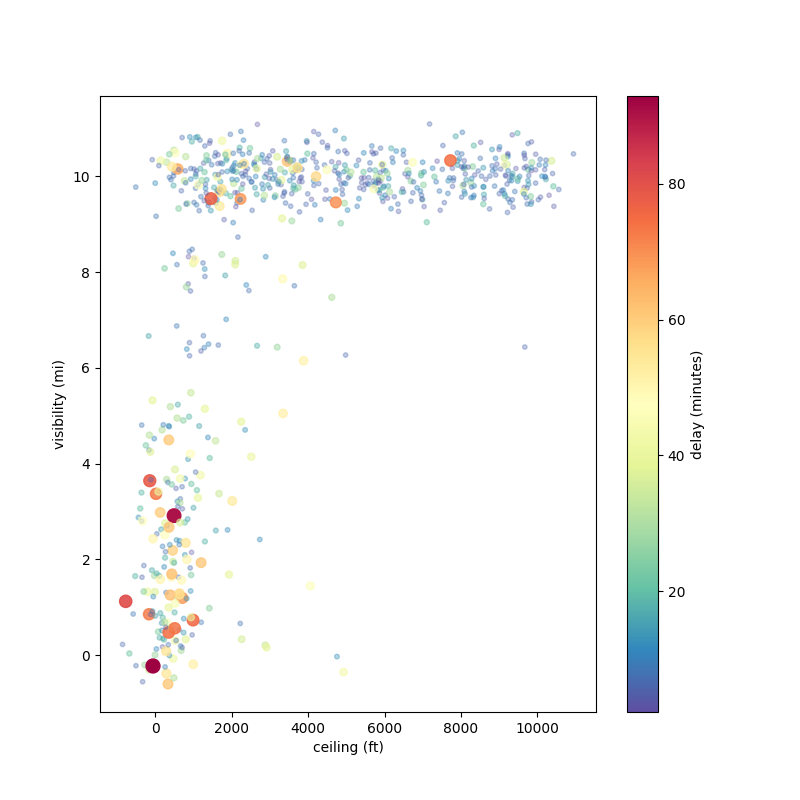

In [170]:
freq = '1D'
start = '2018-01-01'
end = '2020-01-01'

processed_ceiling = process_series(
    wdf.hsc_ceiling_height,
    ('filter_index', start, end),
    ('clip', .1, 100), 
    ('scale', 100), 
    ('inverse'), 
    ('mean', freq), 
    ('inverse'),
)

processed_visibility = process_series(
    wdf.hourly_visibility,
    ('filter_index', start, end),
    ('clip', .001, 10), 
    # ('inverse'), 
    # ('mean', freq), 
    # ('inverse'),
    ('min', freq)
)

d = process_series(
    sdf_outgoing.departure_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

a = process_series(
    sdf_incoming.arrival_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

processed_delay = process_series(
    sdf.event_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

samples = np.array([processed_ceiling, processed_visibility])

print(samples)

def scatter_test(processed_ceiling, processed_visibility, a, k=.04):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    a = a.to_numpy()

    # define color map
    cmap = plt.colormaps["Spectral_r"]
    # c = kde(samples).evaluate(samples)
    c = a * 60 #* kde(samples).evaluate(samples)

    norm = colors.Normalize(min(c), max(c))

    def rand_jitter(arr, k=.01):
        stdev = (.01 if k is None else k) * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev

    def jitter(ax, x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, k=None, **kwargs):
        return ax.scatter(rand_jitter(x, k), rand_jitter(y, k), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

    cn = ((c-min(c))/(max(c)-min(c)))
    cns = 90*(cn**2)+10
    cna = .7*cn+.3
    jitter(ax, processed_ceiling, processed_visibility, c=c, cmap=cmap, alpha=cna, s=cns, k=k)

    # ax.set_xlim(-80, 4000)
    # ax.set_ylim(-.1, 5)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    cbar.set_label('delay (minutes)')

    ax.set_xlabel('ceiling (ft)')
    ax.set_ylabel('visibility (mi)')

    return fig

fig = scatter_test(processed_ceiling, processed_visibility, processed_delay)

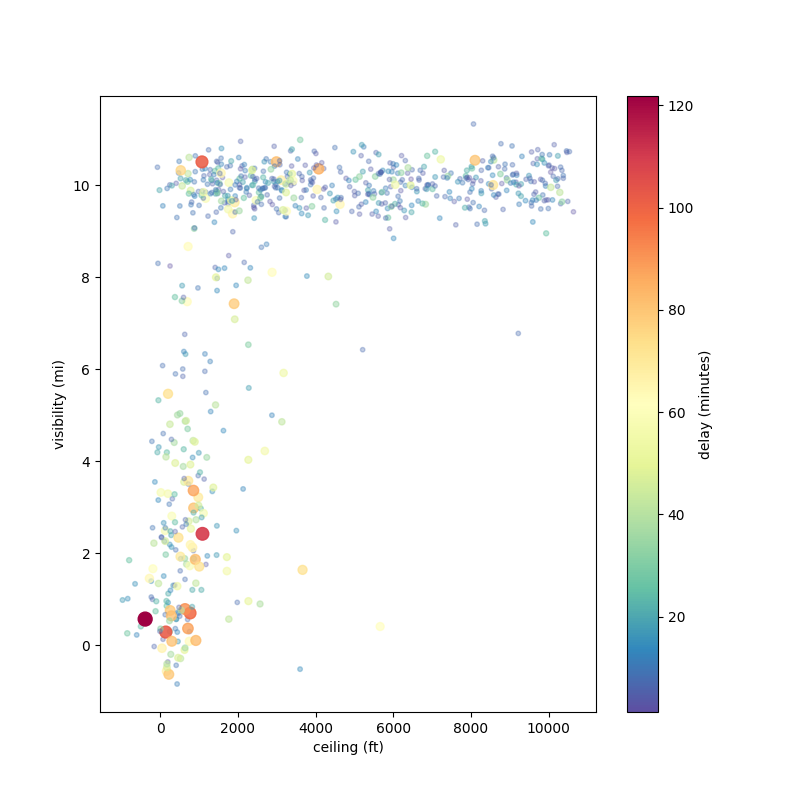

In [171]:
fig = scatter_test(processed_ceiling, processed_visibility, a)

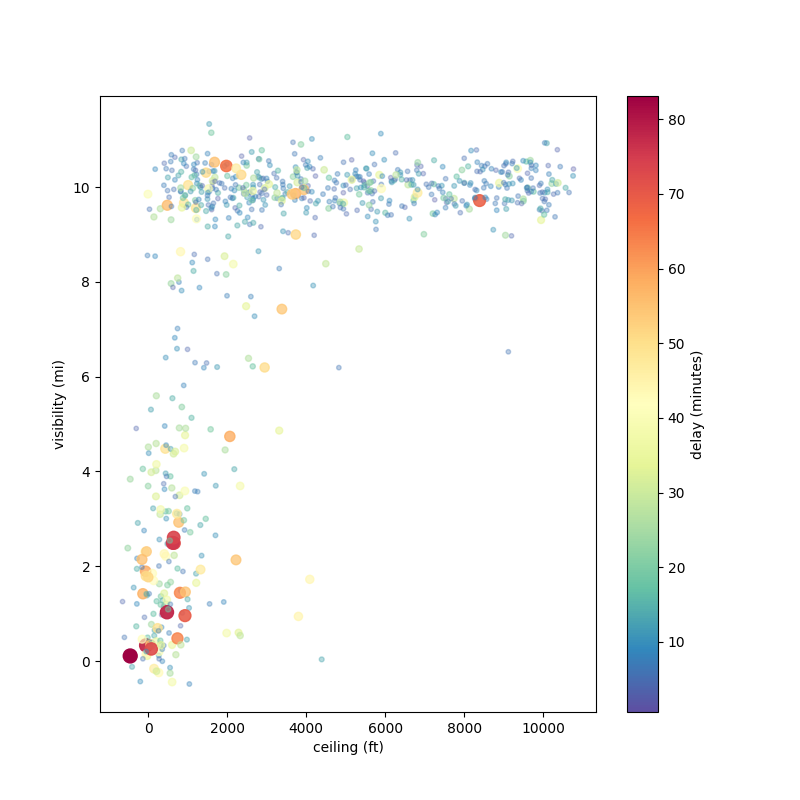

In [172]:
fig = scatter_test(processed_ceiling, processed_visibility, d)

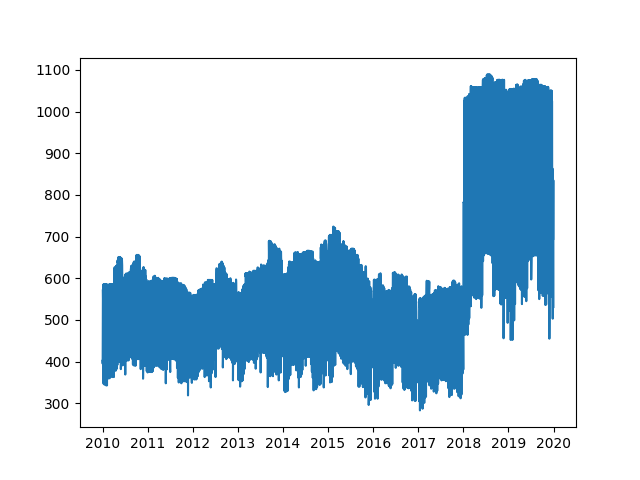

In [81]:
freq = '1D'
start = '2010-01-01'
end = '2020-01-01'

flight_counts = process_series(
    sdf.flight_number,
    ('size', freq)
)

plt.figure()
plt.plot(flight_counts)

Text(0.5, 1.0, 'daily flight counts')

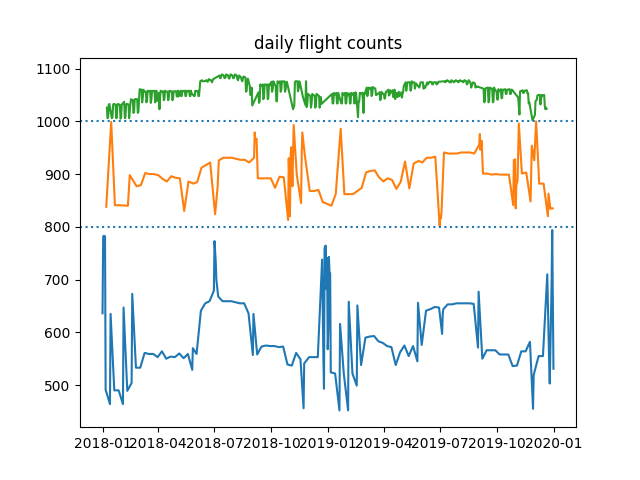

In [179]:
freq = '1D'
start = '2018-01-01'
end = '2020-01-01'

flight_counts = process_series(
    sdf.flight_number,
    ('size', freq),
    ('filter_index', start, end)
)

cutoffs = [0, 800, 1000, 9999]

flight_counts_list = []
names = []
cutoff_lines = []

for i in range(1, len(cutoffs)):
    lo = cutoffs[i-1]
    hi = cutoffs[i]
    fc = flight_counts.loc[
        (flight_counts > lo) & (flight_counts <= hi)
    ]
    flight_counts_list.append(fc)
    names.append(f'days with daily flight count in [{lo}, {hi}), total: {len(fc)}')
    # cutoff_lines.append(hi)
cutoff_lines = cutoffs[1:-1]

zlist = list(zip(flight_counts_list, names))

plt.figure()
for fc, name in zlist:
    plt.plot(fc)
for cl in cutoff_lines:
    plt.axhline(cl, linestyle=':')
plt.title('daily flight counts')
# plt.legend()

Text(0.5, 1.0, 'daily flight counts')

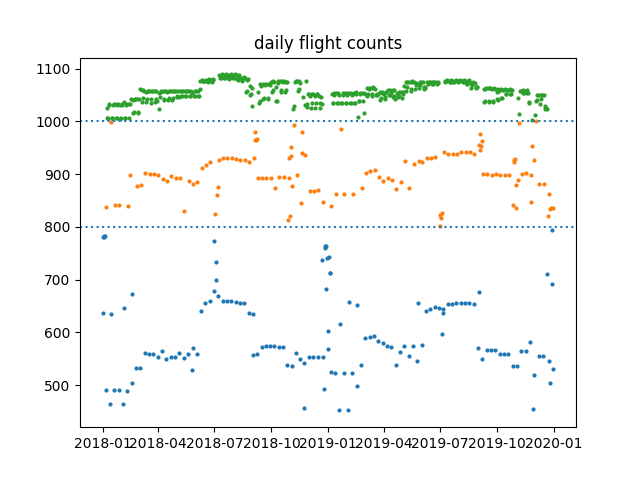

In [117]:
plt.figure()
# print(len(list(zlist)))
for fc, name in zlist:
    # print("hi")
    # print(fc.index, fc, name)
    plt.scatter(fc.index, fc, s=4)
for cl in cutoff_lines:
    plt.axhline(cl, linestyle=':')
plt.title('daily flight counts')
# plt.legend()

In [175]:
def split_scatter_test(lst, zl_idx):
    idx = lst[zl_idx].index
    fig = scatter_test(
        processed_ceiling[idx], 
        processed_visibility[idx], 
        processed_delay[idx]
    )
    fig.suptitle(names[zl_idx])
    return fig

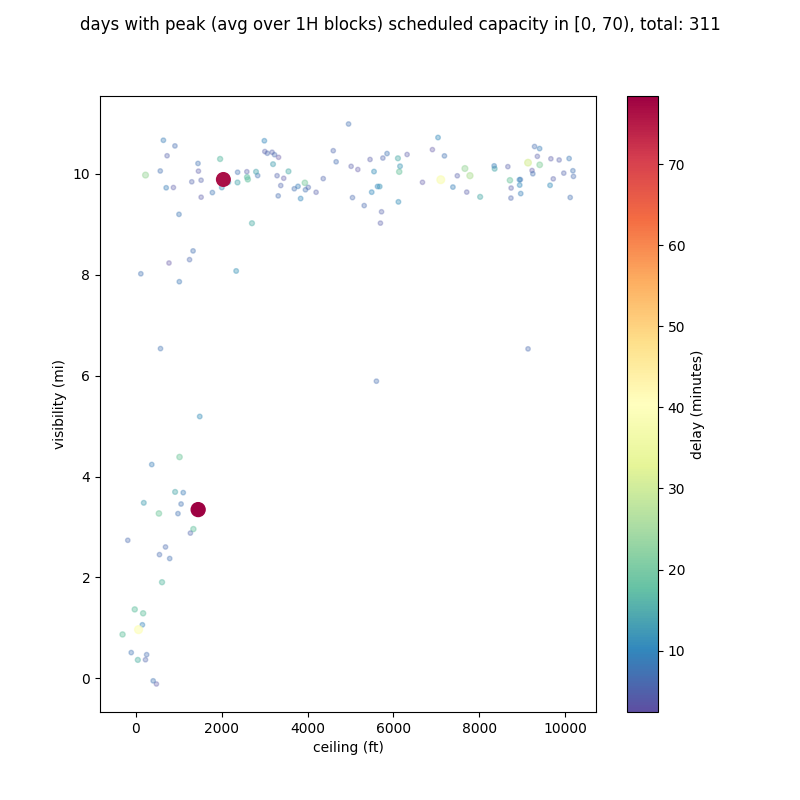

In [176]:
fig = split_scatter_test(flight_counts_list, 0)

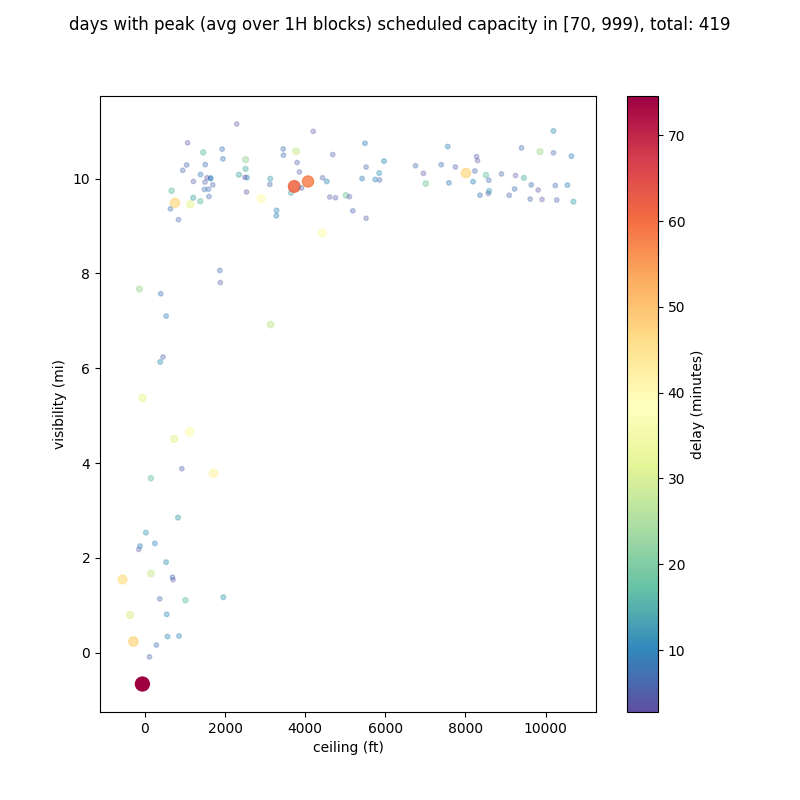

In [177]:
fig = split_scatter_test(flight_counts_list, 1)

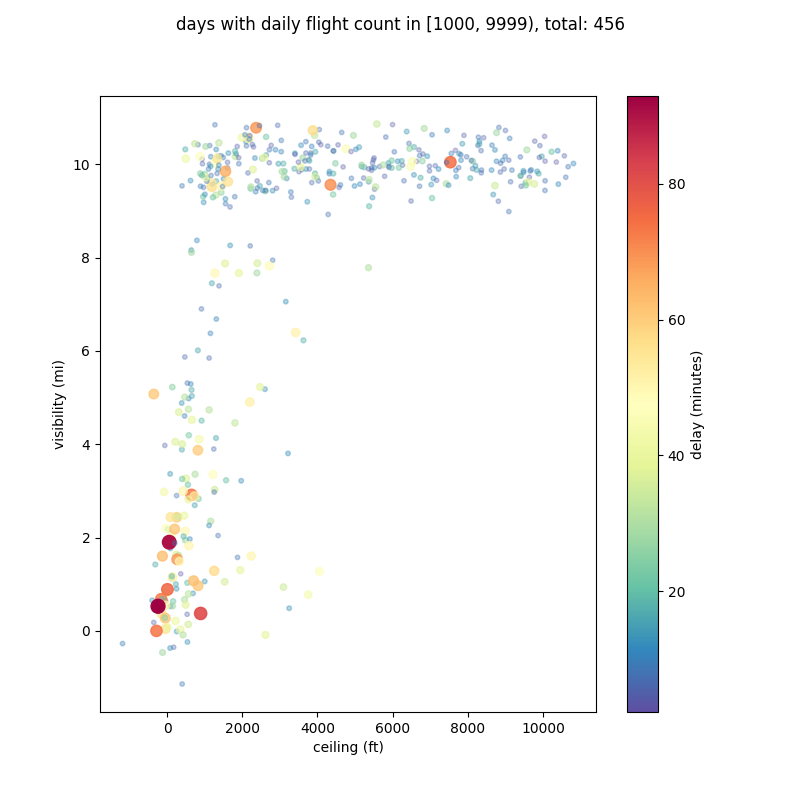

In [180]:
fig = split_scatter_test(flight_counts_list, 2)

Text(0.5, 1.0, 'daily peak (avg over 1H blocks) scheduled capacity')

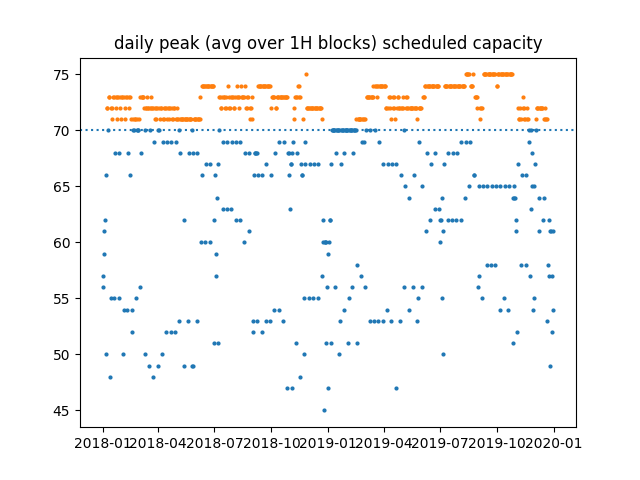

In [181]:
freq = '1D'
start = '2018-01-01'
end = '2020-01-01'

tmp = sdf.scheduled_event_datetime.copy()
tmp.index = pd.DatetimeIndex(sdf.scheduled_event_datetime)
# print(tmp)

l = 1
capacity_counts = process_series(
    tmp,
    ('filter_index', start, end),
    ('size', f'{l}H'),
    ('scale', 1/l),
    ('max', freq),
)

cutoffs = [0, 70, 999]

capacity_counts_list = []
names = []
cutoff_lines = []

for i in range(1, len(cutoffs)):
    lo = cutoffs[i-1]
    hi = cutoffs[i]
    fc = capacity_counts.loc[
        (capacity_counts > lo) & (capacity_counts <= hi)
    ]
    capacity_counts_list.append(fc)
    names.append(f'days with peak (avg over {l}H blocks) scheduled capacity in [{lo}, {hi}), total: {len(fc)}')
    # cutoff_lines.append(hi)
cutoff_lines = cutoffs[1:-1]

zlist = list(zip(capacity_counts_list, names))

plt.figure()
# print(len(list(zlist)))
for fc, name in zlist:
    # print("hi")
    # print(fc.index, fc, name)
    plt.scatter(fc.index, fc, s=4)
for cl in cutoff_lines:
    plt.axhline(cl, linestyle=':')
plt.title(f'daily peak (avg over {l}H blocks) scheduled capacity')
# plt.legend()

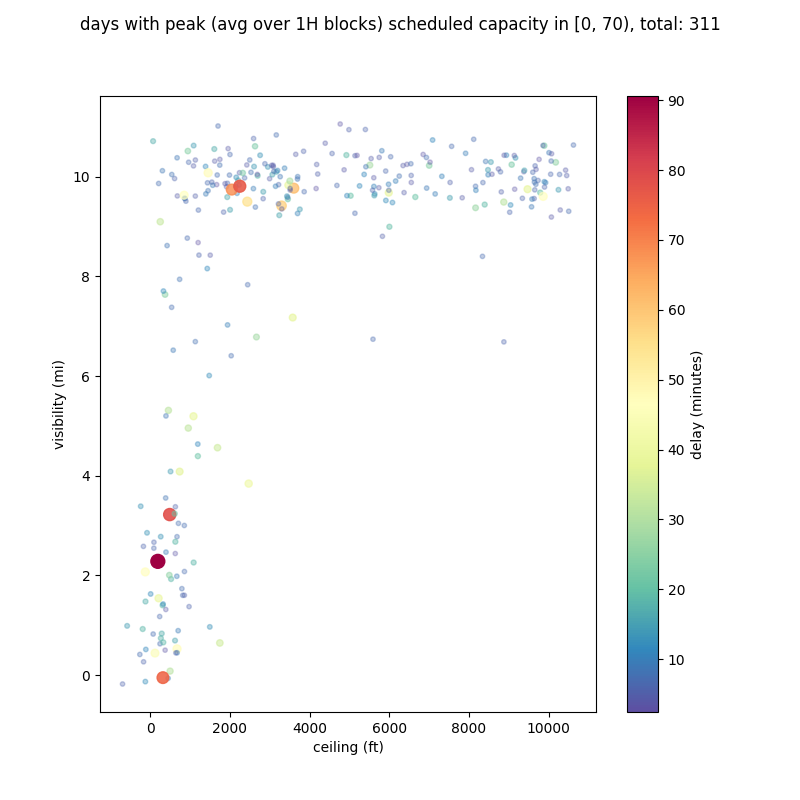

In [182]:
fig = split_scatter_test(capacity_counts_list, 0)

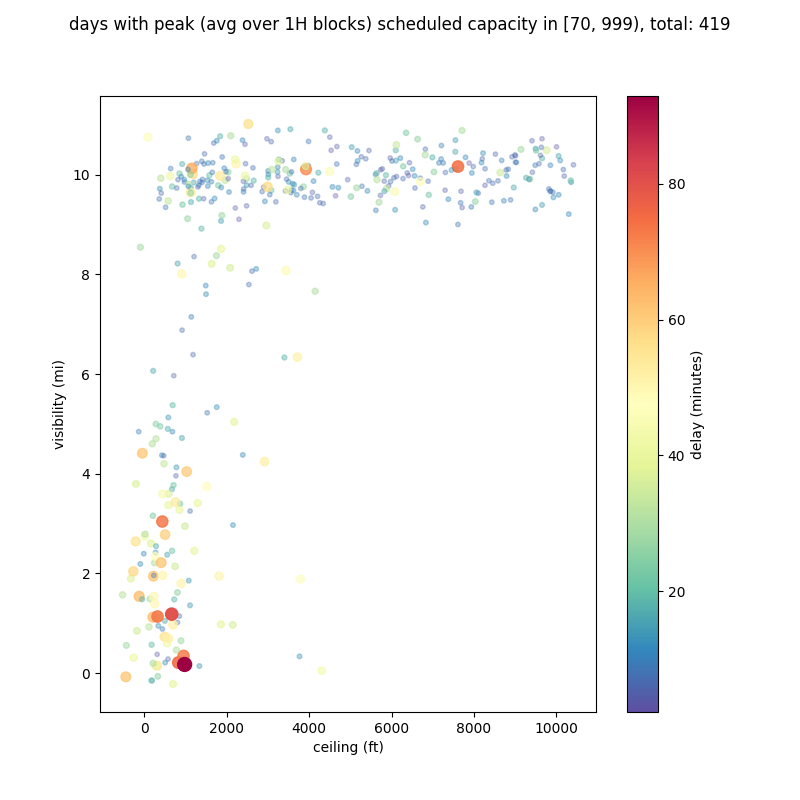

In [183]:
fig = split_scatter_test(capacity_counts_list, 1)

In [185]:
def scatter_test_3d(processed_ceiling, processed_visibility, z, z_label, a, k=.04):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')

    a = a.to_numpy()

    c = a * 60 #* kde(samples).evaluate(samples)
    cmap = plt.colormaps["Spectral_r"]

    norm = colors.Normalize(min(c), max(c))

    def rand_jitter(arr, k=.01):
        stdev = (.01 if k is None else k) * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev

    def jitter(ax, x, y, z, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, k=None, **kwargs):
        return ax.scatter(rand_jitter(x, k), rand_jitter(y, k), rand_jitter(z, k), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

    cn = ((c-min(c))/(max(c)-min(c)))
    cns = 190*(cn**2)+10
    cna = .6*cn+.4
    jitter(ax, processed_ceiling, processed_visibility, z, c=c, cmap=cmap, alpha=cna, s=cns, k=k)

    # ax.set_xlim(-80, 4000)
    # ax.set_ylim(-.1, 5)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    cbar.set_label('delay (minutes)')

    ax.set_xlabel('ceiling (ft)')
    ax.set_ylabel('visibility (mi)')
    ax.set_zlabel(z_label)

    # for angle in range(0, 360):
    #     ax.view_init(30, 40)
    ax.view_init()

    return fig


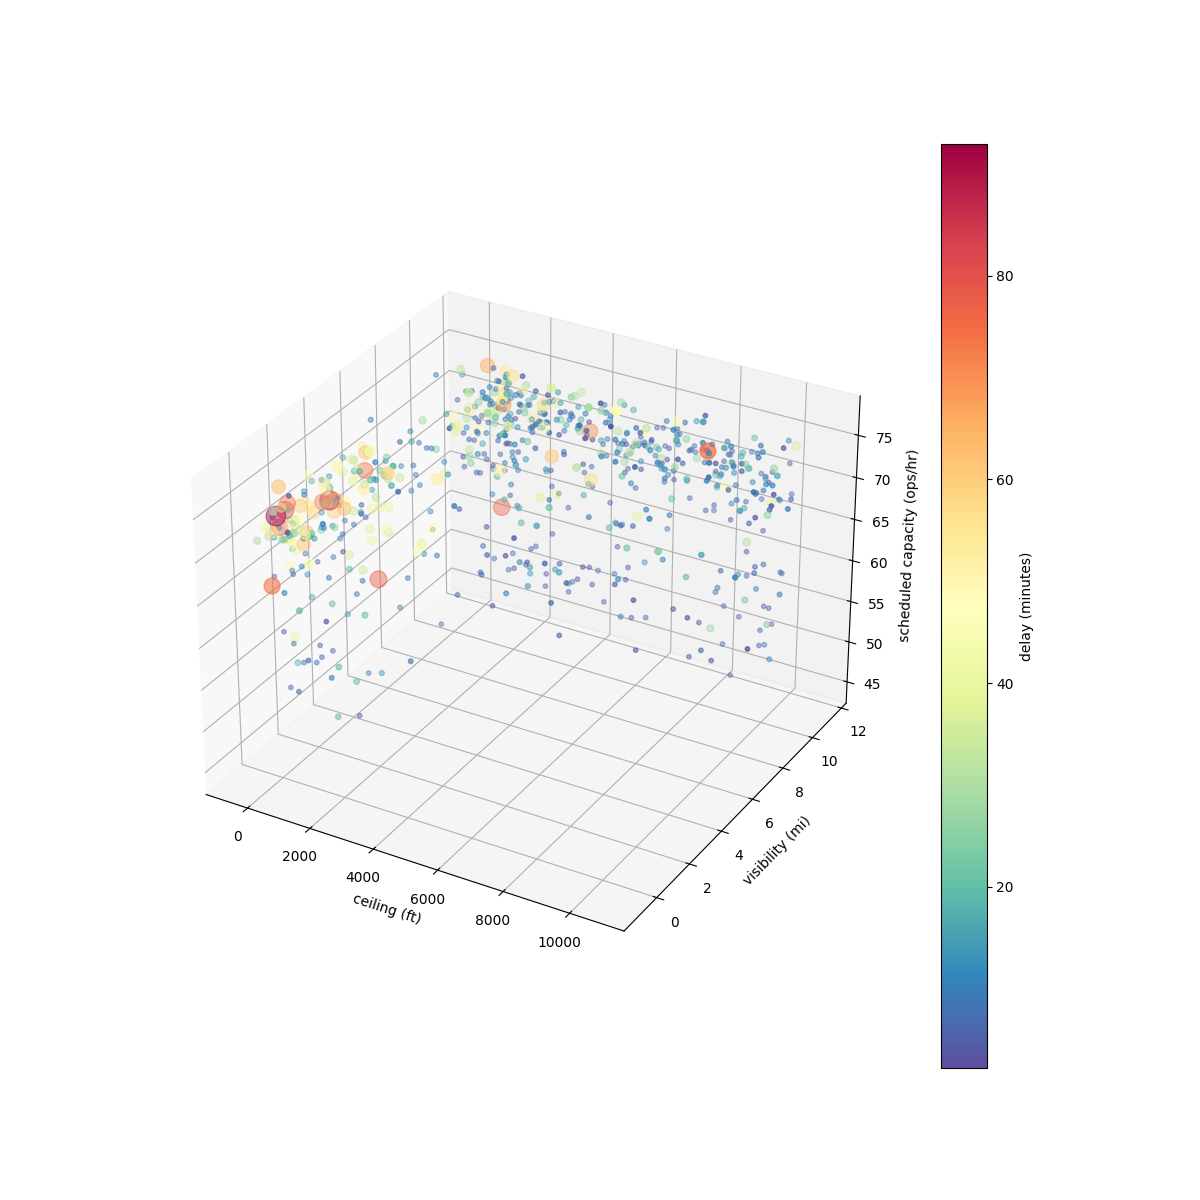

In [191]:
idx = capacity_counts.index
fig = scatter_test_3d(
    processed_ceiling[idx], 
    processed_visibility[idx], 
    capacity_counts, 
    'scheduled capacity (ops/hr)', 
    processed_delay[idx], 
    k=.04
)

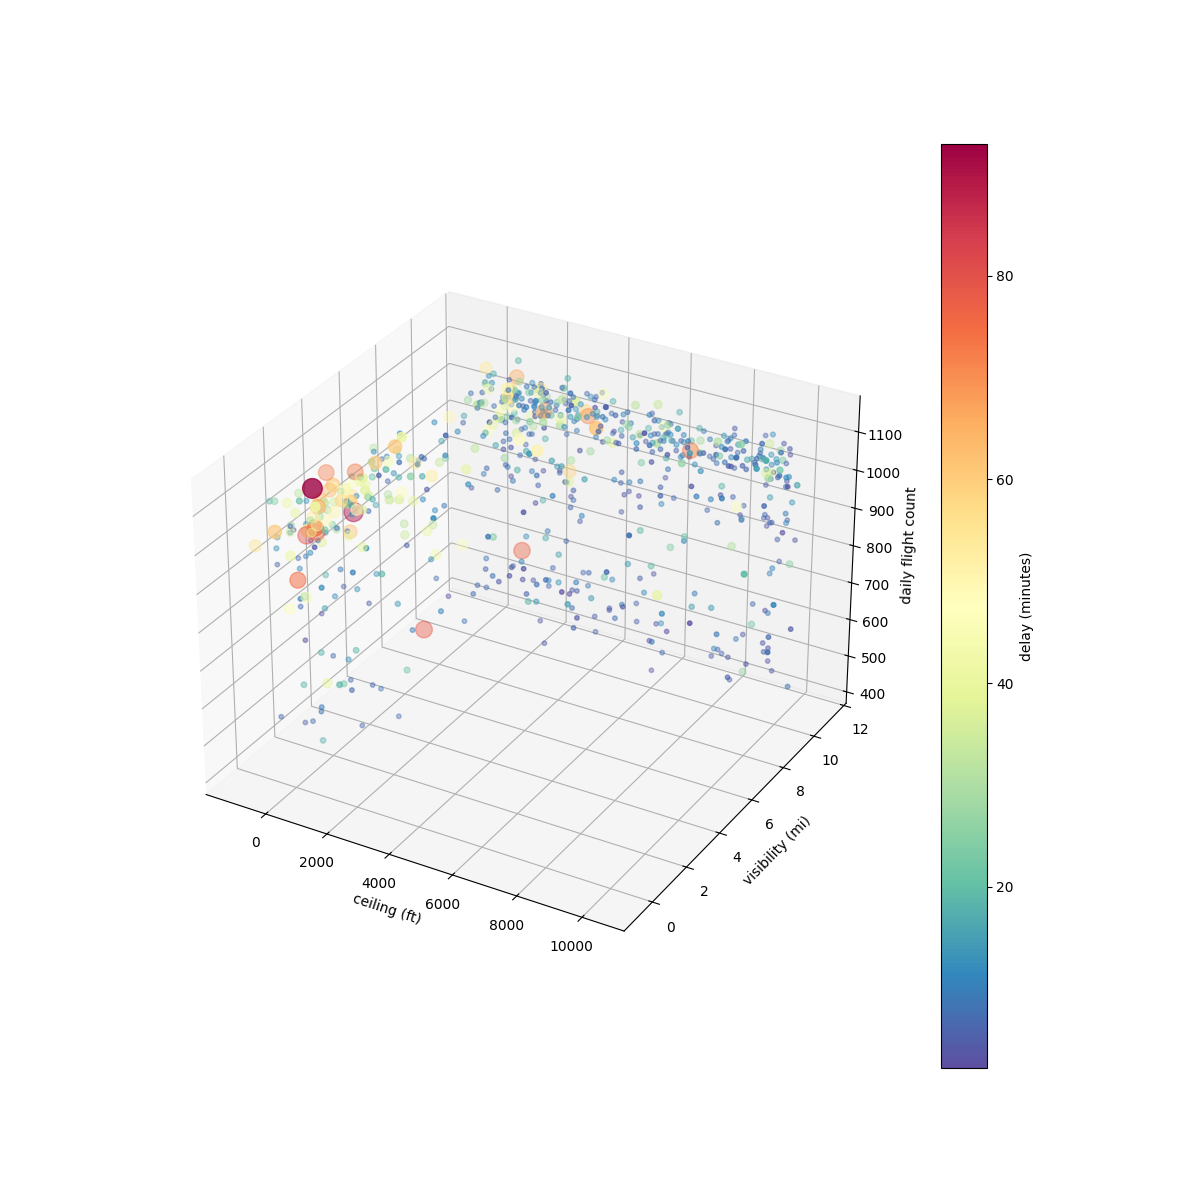

In [192]:
idx = flight_counts.index
fig = scatter_test_3d(
    processed_ceiling[idx], 
    processed_visibility[idx], 
    flight_counts, 
    'daily flight count', 
    processed_delay[idx], 
    k=.04
)

In [194]:
for series, name in (
    (processed_visibility, 'w_processed_visibility'),
    (processed_ceiling, 'w_processed_ceiling'),
    (flight_counts, 'x_flight_counts'),
    (capacity_counts, 'x_capacity_counts'),
    (d, 'y_departure_delays'),
    (a, 'y_arrival_delays'),
    (processed_delay, 'y_event_delays')
):
    series.to_csv(f'{name}.csv')
    series.to_frame(f'{name}').to_parquet(f'{name}.parquet')

